In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [101]:
df = pd.read_csv("ap.csv")
df['date'] = pd.to_datetime(df['date'], format="%Y")
df.set_index("date", inplace=True)


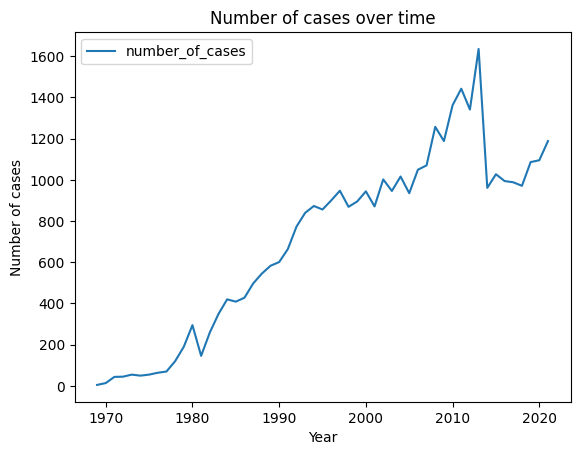

In [102]:
sns.lineplot(data=df)
plt.title("Number of cases over time")
plt.xlabel("Year")
plt.ylabel("Number of cases")
plt.show()


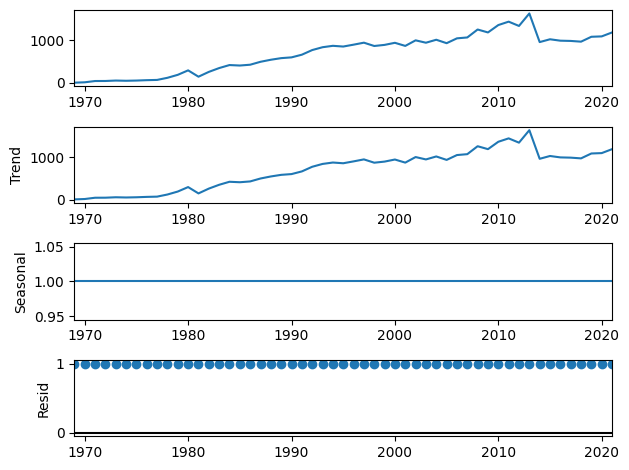

In [103]:
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()


In [117]:
train = df[:-4]
test = df[-4:]


In [118]:
model = SARIMAX(train, order=(1,1,0), seasonal_order=(1,1,0,12))
model_fit = model.fit()


C:\Users\Deepa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Deepa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Deepa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [119]:
accuracy = mape(y_true, y_pred)
print(f"MAPE: {accuracy:.2f}%")



MAPE: nan%


In [120]:
error = 100 * (model_fit.resid.mean() / df.mean())
print(f"Error Percentage: {error}")


Error Percentage: number_of_cases   -0.158694
dtype: float64


In [121]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = df['number_of_cases']
y_pred = model_fit.predict(start=len(df), end=len(df)+len(y_true)-1)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse}")

mse = mean_squared_error(y_true, y_pred)
print(f"MSE: {mse}")


RMSE: 742.0124968541045
MSE: 550582.5454876624


In [125]:
predictions = model_fit.forecast(steps=10)
print("Forecast for upcoming 10 years:")
print(predictions)


Forecast for upcoming 10 years:
2018-01-01    1061.549774
2019-01-01    1065.680887
2020-01-01    1184.939372
2021-01-01    1170.724495
2022-01-01    1226.043052
2023-01-01    1280.665848
2024-01-01    1250.243695
2025-01-01    1371.531206
2026-01-01    1076.381421
2027-01-01    1084.966471
Freq: AS-JAN, Name: predicted_mean, dtype: float64


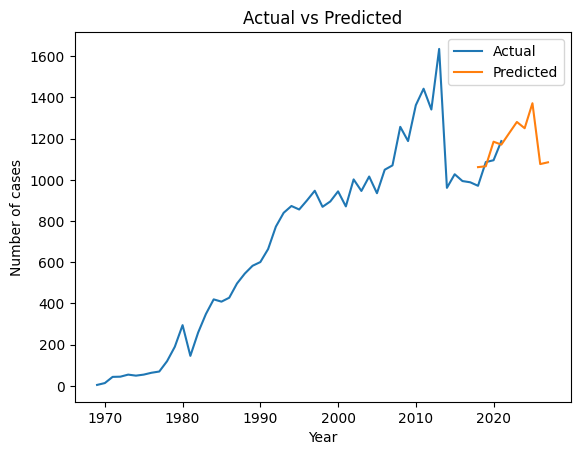

In [126]:
plt.plot(df, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Year")
plt.ylabel("Number of cases")
plt.legend()
plt.show()

In [127]:
from pandas import date_range

# extend the date range
future_dates = date_range(start='2022-01-01', end='2026-12-31', freq='A')

# make predictions
future_predictions = model_fit.predict(start=len(df), end=len(df)+len(future_dates)-1, typ='levels')

# create a dataframe with future dates and predictions
future_df = pd.DataFrame({'date': future_dates, 'number_of_cases': future_predictions})
future_df


,date,number_of_cases
2022-01-01,2022-12-31,1226.043052
2023-01-01,2023-12-31,1280.665848
2024-01-01,2024-12-31,1250.243695
2025-01-01,2025-12-31,1371.531206
2026-01-01,2026-12-31,1076.381421


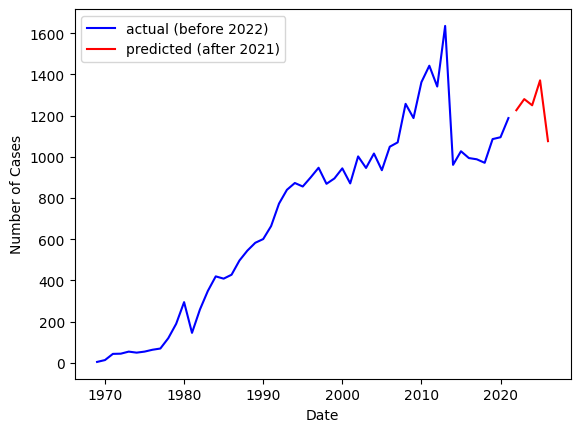

In [128]:
import matplotlib.pyplot as plt
import pandas as pd

# load the data into a pandas dataframe
df = pd.read_csv("Jumbled.csv")

# add a column to the dataframe to store the year
df['year'] = df['date'].apply(lambda x: int(str(x)[:4]))

# create a mask to differentiate the data based on the year
mask = df['year'] <= 2021

# plot the data before the year 2022 in blue
plt.plot(df[mask]['date'], df[mask]['number_of_cases'], color='blue', label='actual (before 2022)')

# plot the data after the year 2021 in red
plt.plot(df[~mask]['date'], df[~mask]['number_of_cases'], color='red', label='predicted (after 2021)')

# add a legend and labels to the plot
plt.legend()
plt.xlabel("Date")
plt.ylabel("Number of Cases")

# show the plot
plt.show()
